## Laboration - Sweet & Conquer

**[Top Secret] Intelligence Briefing**


Mayday! Mayday! 

One of the farmers of Fire Nation, whilst on a trip abroad to the neighbouring Earth Kingdom, was bored and apparently threw an apple at a local peasant. 

Now, 24h hours later, the world is at war.

The conflict first involved only Fire Nation & the Earth Kingdom - but the Water Tribe and the Air Nomads swiftly decided to join in as well (for some random reason). 

Rumour is that they also wanted to join in on the apple free-for-all fiesta.


**Main objective**

Evidently, to win 'the apple wars', the goal of each faction is to steal all fruits from the others.

Our objective is to simulate the dynamics of this little... dispute. 


**Grading criteria & general instructions**

In general, grading will be based on the code in it's entirety. Extra weight will be put on readability, so think carefully about proper variable usage, method naming & docstrings and supplemental comments. 

Importantly, also make sure to implement type hints wherever applicable!

The tasks are categorized into difficulty tiers. To pass the lab (betyg G), you only need to work on the tasks designated with * (1 star) and completing most of them in a satisfactory manner. 

Succesfully completing the tasks marked with ** (two stars), and making atleast some progress on the one marked with *** (3 stars) ears your the higher grade (betyg VG).

There is another task, marked with BONUS. That one has no impact on the grading, but adds a fun dynamic to the simulation. It requires the task marked with *** to be completed first.



## Tasks

Here's the boilerplate (starter code) for a class called Faction that you'll be working on. The instances of this class will represent the different competing factions.

In [15]:
import matplotlib.pyplot as plt
import random
import math 
import time

class Faction:
    def __init__(self, name: str, apples: int, oranges: int, bananas: int, strawberries: int) -> None:

        """Initialize a Faction instance with its name and initial fruit resources."""

        self.name = name
        self.apples = apples
        self.oranges = oranges
        self.bananas = bananas
        self.strawberries = strawberries

        # All attributes will be validated by their respective property setters
    
    # NAME ATTRIBUTE PROPERTIES WITH GETTER AND SETTER 

    @property
    def name(self) -> str:
        """Return the faction name."""

        return self.__name
    
    @name.setter
    def name(self, value) -> None:
        """Set the faction name 
        
        Args:
            value: The new faction name

        Raises:    
            TypeError: If the value is not a string
        """

        if not isinstance(value, str):
            raise TypeError("Name must be a string")
        self.__name = value 

    # APPLE ATTRIBUTE PROPERTIES WITH GETTER AND SETTER 

    @property
    def apples(self) -> int:
        """Return the current number of apples."""

        return self.__apples
    
    @apples.setter
    def apples(self, value) -> None:
        """Set the number of apples for faction  

        Args:
            value: The new number of apples 

        Raises:
            TypeError: If value is not an integer 
            ValueError: If value is outside the range [0, 200]
        """

        if not isinstance(value, int):
            raise TypeError("Apples must be an integer")
        
        if not (0 <= value <= 200):
            raise ValueError("Apples must be between 0 and 200")
        self.__apples = value

    # PROPERTIES OF ORANGE ATTRIBUTES WITH GETTER AND SETTER

    @property
    def oranges(self) -> int:
        """Return the current number of oranges."""

        return self.__oranges
    
    @oranges.setter
    def oranges(self, value) -> None:
        """Set the number of oranges for faction  

        Args:
            value: The new number of oranges 

        Raises:
            TypeError: If value is not an integer 
            ValueError: If value is outside the range [0, 200]
        """

        if not isinstance(value, int):
            raise TypeError("Oranges must be an integer")
        
        if not (0 <= value <= 200):
            raise ValueError("Oranges must be between 0 and 200")
        self.__oranges = value

     # BANANAS ATTRIBUTE PROPERTIES WITH GETTER AND SETTER
    
    @property
    def bananas(self) -> int:
        """Return the current number of bananas."""

        return self.__bananas
    
    @bananas.setter
    def bananas(self, value) -> None:
        """Set the number of bananas for faction  

        Args:
            value: The new number of bananas 

        Raises:
            TypeError: If value is not an integer 
            ValueError: If value is outside the range [0, 200]
        """
        
        if not isinstance(value, int):
            raise TypeError("Bananas must be an integer")
        
        if not (0 <= value <= 200):
            raise ValueError("Bananas must be between 0 and 200")
        self.__bananas = value
        
    # STRAWBERRY ATTRIBUTE PROPERTIES WITH GETTER AND SETTER 

    @property
    def strawberries(self) -> int:
        """Return the current number of strawberries."""

        return self.__strawberries
    
    @strawberries.setter
    def strawberries(self, value) -> None:
        """Set the number of strawberries for faction  

        Args:
            value: The new number of strawberries 

        Raises:
            TypeError: If value is not an integer 
            ValueError: If value is outside the range [0, 200]
         """

        if not isinstance(value, int):
            raise TypeError("Strawberries must be an integer")
        
        if not (0 <= value <= 200):
            raise ValueError("Strawberries must be between 0 and 200")
        self.__strawberries = value


    def inventory(self) -> int:

        """Return the total number of fruits faction currently possesses."""

        total = self.apples + self.oranges + self.bananas + self.strawberries

        return total     # Returns the total amount of apples, oranges, bananas, and strawberries.
    
    def inventory_message(self) -> str:
        """Return a formatted message with the total number of fruits."""
        total = self.inventory()
        return f"The faction {self.name} now has a total of {total} fruits."

    
    def status(self) -> None:
        """ Print a message describing the current strength of the faction.

        The message depends on the total number of fruits:
        - total ≤ 150   → struggling
        - 150 < total ≤ 500 → ready to fight
        - total > 500   → dominant position 
        """

        total = self.inventory()         # Get total number of fruits owned by the faction

        if total <= 150:
            print(f"This aint nothin but a scratch! {self.name} might be struggling for the moment, but will be back with vengeance!")

        elif 150 < total <= 500:
            print(f"The proud {self.name} is VERY eager to toss some apples! Where are the opponents?!")

        else:
            print(f"{self.name} is GODLIKE! Their position is super dominant!")


    def visualize_resources(self,  ax=None) -> None:
        """ Visualize the current fruit resources as a bar chart.

        The fruits are displayed in ascending order based on their quantity.
        Each bar is colored according to the quantity:
            - green  : quantity ≥ 100
            - orange : 50 < quantity < 100
            - red    : quantity ≤ 50 
        """

        # Collect fruit names and quantities
        fruits = ['Apples', 'Oranges', 'Bananas', 'Strawberries']
        quantity = [self.apples, self.oranges, self.bananas, self.strawberries]
        colors = []

        # Pair fruits with their quantities and sort from lowest to highest
        pares = list(zip(fruits, quantity))
        pares.sort(key=lambda x: x[1], reverse=False)

        # Unpack sorted pairs back into separate lists
        fruits, quantity = zip(*pares)   
        fruits = list(fruits)
        quantity = list(quantity)

        # Determine bar colors based on quantity thresholds
        for q in quantity:
            if q >= 100:
                colors.append("green")
            elif 50 < q < 100:
                colors.append("orange")
            else:
                colors.append("red")

        # If no axis is provided, create a new one
        created_locally = False
        if ax is None:
            fig, ax = plt.subplots(figsize=(8, 5))
            created_locally = True

        # Create the bar chart
        bars = ax.bar(fruits, quantity, color=colors, edgecolor="black")

        # Label axes and add title
        ax.set_title(f"{self.name} — Fruit Inventory")
        ax.set_xlabel("Fruits")
        ax.set_ylabel("Quantity")
        ax.set_ylim(0, 200)

        # Display quantity labels above each bar
        for bar, qty in zip(bars, quantity):
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() + 3,
                str(qty),
                ha="center",
                va="bottom",
            )

        # Only show the plot if it was created inside this method
        if created_locally:
            plt.tight_layout()
            plt.show()


    def organical_growth(self) -> None:
        """ Simulate organic growth of fruits by increasing each randomly between 1 and 5.

        Each fruit's quantity grows individually by a random amount (1 - 5),
        but cannot exceed the maximum capacity of 200 """

        # Define the fruit attributes to grow

        fruits = ["apples", "oranges", "bananas", "strawberries"]

        for fruit in fruits:
            current_amount = getattr(self, fruit)

            # Generate random increase between 1 and 5
            increase = random.randint(1, 5)

            if current_amount < 200:
                new_amount = current_amount + increase

                # Ensure it does not exceed the maximum capacity
                if new_amount > 200:
                    new_amount = 200

                # Update the attribute
                setattr(self, fruit, new_amount)

                print(f"Glorious {self.name} has harvested {increase} {fruit}, to a new total of {new_amount}!")

            else:
                print(f"Glorious {self.name} is already at maximum capacity for {fruit}!")

       


    def __mul__(self, other: object) -> bool:
        """Simulate an attack: self * other.

        Success chance: 70%. On success, loots 20% of each fruit from the defender.
        Critical (10% independent): loot becomes 40%.
        If defender has <=5 of a fruit, steal all (humiliating blow).
        Attacker cannot exceed 200 per fruit; overflow becomes casualties of war.

        Args:
            other (Faction): The defending faction.

        Returns:
            bool | NotImplementedType: True if attack succeeded, False if failed,
            or NotImplemented if other is not a Faction.

        Notes:
            Prints narrative messages and updates both factions in place.
        """
        
        # Local configuration (could be module-level constants if preferred)
        success_prob = 0.70
        crit_prob = 0.10
        loot_pct = 0.20
        loot_pct_crit = 0.40
        humiliating_threshold = 5
        max_per_fruit = 200


        # Type validation: allow subclasses of Faction (better polymorphism)
        if not isinstance(other, Faction):
            return NotImplemented
        
        # Abort if defender has no resources
        if other.inventory() == 0:
            print(f"No GLORY: {other.name} has no resources left. Choose another target.")
            return False
        
        # Success roll (70% chance)
        if random.random() > success_prob:
            print(f"{other.name} defended skillfully! The attack failed.")
            time.sleep(2)
            return False
        
        # Critical roll and loot percentage
        is_critical = random.random() < crit_prob
        loot_pct = loot_pct_crit if is_critical else loot_pct

        if is_critical:
            print(f"CRITICAL STRIKE! Loot percentage is {int(loot_pct*100)}%")

        else:
            print(f"Successful attack! Loot percentage is {int(loot_pct*100)}%")
        time.sleep(2)

        fruits = ["apples", "oranges", "bananas", "strawberries"]
        total_looted = 0
        total_casualties = 0

        for fruit in fruits:
            defender_have = getattr(other, fruit)
            attacker_have = getattr(self, fruit)

            if defender_have == 0:
                continue  # nothing to steal of this fruit

            # Humiliating blow: steal all if few remain
            if defender_have <= humiliating_threshold:
                to_steal = defender_have
                reason = "humiliating"
            else:
                # Percentage-based loot; ensure at least 1 when defender has enough
                to_steal = int(math.floor(defender_have * loot_pct))
                if to_steal < 1:
                    to_steal = 1 
                reason = "percentage"

            # Capacity check: attacker cannot exceed per-fruit cap
            capacity =  max_per_fruit - attacker_have
            if capacity <= 0:
                gained = 0
                casualties = to_steal
            else:
                gained = min(to_steal, capacity)
                casualties = to_steal - gained

            # Apply changes

            new_defender = defender_have - to_steal
            new_attacker = attacker_have + gained

            setattr(other, fruit, new_defender)
            setattr(self, fruit, new_attacker)

            # Per-fruit narration
            if reason == "humiliating":
                print(f"{self.name} lands a HUMILIATING BLOW and steals the last {to_steal} {fruit} from {other.name}!")
            else:
                crit_txt = " (CRITICAL!)" if is_critical else ""
                print(f"{self.name} loots {to_steal} {fruit} from {other.name}{crit_txt}.")

            if casualties > 0:
                print(f"{casualties} {fruit} are lost in the chaos (cannot be stored).")

            print(f"{self.name}: {new_attacker}/{max_per_fruit} {fruit}  |  {other.name}: {new_defender} {fruit}")
            time.sleep(1)

            total_looted += to_steal
            total_casualties += casualties

        # Final summary (useful for users and graders)
        print(f"\nSummary — Total looted: {total_looted}; casualties (lost): {total_casualties}.")
        return True

    def trade_offer(self, other: "Faction", give_fruit: str, give_amount: int, get_fruit: str, get_amount: int) -> bool:
        """Propose a trade between two factions."""

        give_fruit = give_fruit.strip().lower()
        get_fruit  = get_fruit.strip().lower()

        fruits = {"apples", "oranges", "bananas", "strawberries"}

        # Validate fruit names
        if give_fruit not in fruits or get_fruit not in fruits:
            print("Trade declined: invalid fruit name.")
            return False
        
        # A faction can't trade with itself
        if self is other:
            print("Trade declined: cannot trade with yourself.")
            return False
        
        # Validate amounts (must be positive and <= 200)
        if not (0 < give_amount <= 200 and 0 < get_amount <= 200):
            print("Trade declined: invalid trade amounts.")
            return False

        # Insulting offer -> instant counterattack
        if give_amount < get_amount:
            print(f"{other.name} is insulted by this offer and launches an attack!\n")
            other * self
            return False

        # Check if both factions have enough resource
        if getattr(self, give_fruit) < give_amount:
            print(f"Trade declined: {self.name} doesn't have enough {give_fruit}.")
            return False
        if getattr(other, get_fruit) < get_amount:
            print(f"Trade declined: {other.name} doesn't have enough {get_fruit}.")
            return False

        # Check that the trade won't exceed the 200 fruit limit
        if getattr(self, get_fruit) + get_amount > 200 or \
        getattr(other, give_fruit) + give_amount > 200:
            print("Trade declined: trade would exceed 200 limit.")
            return False

        # Update both inventories
        setattr(self, give_fruit, getattr(self, give_fruit) - give_amount)
        setattr(self, get_fruit, getattr(self, get_fruit) + get_amount)
        setattr(other, give_fruit, getattr(other, give_fruit) + give_amount)
        setattr(other, get_fruit, getattr(other, get_fruit) - get_amount)

        # Print confirmation
        print(f"Trade accepted! {self.name} traded {give_amount} {give_fruit} "
            f"for {get_amount} {get_fruit} with {other.name}.")
        return True

    def __repr__(self) -> str:
        """Return a string representation of the faction object"""

        return (f"Faction(name='{self.name}', apples={self.apples}, oranges={self.oranges}, bananas={self.bananas}, strawberries={self.strawberries})")
           

**1)*** 

* The __init__() method

This method should be able to accept the following user-provided arguments: **name**, **apples**, **oranges**, **bananas**, **strawberries** and initiate corresponding attributes with the same name as the arguments. 

Attribute description:

**name**         : the name of the faction

**apples**       : amount of apples currently controlled

**oranges**      : amount of oranges currently controlled

**bananas**      : amount of bananas currently controlled

**strawberries** : amount of strawberries currently controlled

*Don't forget to define getter and setter methods for the attributes!*

--

Restrictions:

The name should be handed in as a string. Implement relevant checks and raise TypeError (with a suitable message) else.

The fruit amounts should be given in integers. Implement relevant checks and raise TypeError (with a suitable message) else.

Furthermore, the fruit amounts should only be between 0-200. Implement relevant checks and raise ValueError (with a suitable message) else.

In [16]:
fire_nation = Faction('Fire Nation', 120, 120, 150, 180)
earth_kingdom = Faction('Earth Kingdom', 6, 4, 2, 1)
water_tribe = Faction('Water Tribe', 100, 100, 100, 100)
air_nomads = Faction('Air Nomads', 100, 100, 100, 100)

In [17]:
#pancake_cult = Faction('Pancake Cult', 30, 20, 200, 210)
#cupcake_assassins = Faction('Cupcake Assassins', 1, 1, 1, -5)
#milk_drinkers = Faction('Milk Drinkers', 30, [50], 200, 160)

**2)*** 

* The __repr__() method

This method takes no user-provided arguments. When called on, **returns** a clear and concise string with information about the current attributes of this instance.

For example, using the following code:

        print(fire_nation)

should print out the following string:

        Faction(name='Fire Nation', apples=120, oranges=120, bananas=150, strawberries=180)

In [18]:
print(fire_nation)
print(earth_kingdom)
print(water_tribe)
print(air_nomads)

Faction(name='Fire Nation', apples=120, oranges=120, bananas=150, strawberries=180)
Faction(name='Earth Kingdom', apples=6, oranges=4, bananas=2, strawberries=1)
Faction(name='Water Tribe', apples=100, oranges=100, bananas=100, strawberries=100)
Faction(name='Air Nomads', apples=100, oranges=100, bananas=100, strawberries=100)


**3)*** 

* getters and setters

You should've already implemented these in problem 1) already, but if not, you really should now.

They allow the user to read and alter the current values of the various private attributes.

For example, using the following code:

        print(fire_nation.name)

should print out the following string:

        Fire Nation

In [19]:
print(fire_nation.name)

Fire Nation


**4)***

* The inventory() method

This method takes no user provided arguments. It **returns** the total amount of fruits the faction currently possess - and this should be a single integer. 

In [20]:
print(fire_nation.inventory())
print(earth_kingdom.inventory())
print(water_tribe.inventory())
print(air_nomads.inventory())

570
13
400
400


**5)***

* The status() method

This method takes no user provided arguments. It prints out the state of each faction depending on the total number of fruits they currently possess.

Here's a guide to what should be printed out, depending on the total number of fruits

        total <= 150:

                This aint nothin but a scratch! {faction_name} might be struggling for the moment, but will be back with vengance!

        150 < total <= 500:

                The proud {faction_name} is VERY eager to toss some apples! Where are the opponents?!
        
        500 < total:

                {faction_name} is GODLIKE! Their position is super dominant!

In [21]:
earth_kingdom.status()
fire_nation.status()
water_tribe.status()

This aint nothin but a scratch! Earth Kingdom might be struggling for the moment, but will be back with vengeance!
Fire Nation is GODLIKE! Their position is super dominant!
The proud Water Tribe is VERY eager to toss some apples! Where are the opponents?!


**6)****

* The visualize_resources() method

This method takes no user provided arguments. It should plot a **bar chart** which visualises the quantity of each fruit currently possessed by the faction.

For bonuspoints, make sure that the color each individual bar is

    green if fruit_amount => 100
    orange if 50 < fruit_amount < 100
    red if fruit_amount <= 50

In general, try to make the plot 'visually appealing'. You might have to do some research online on how to do this.

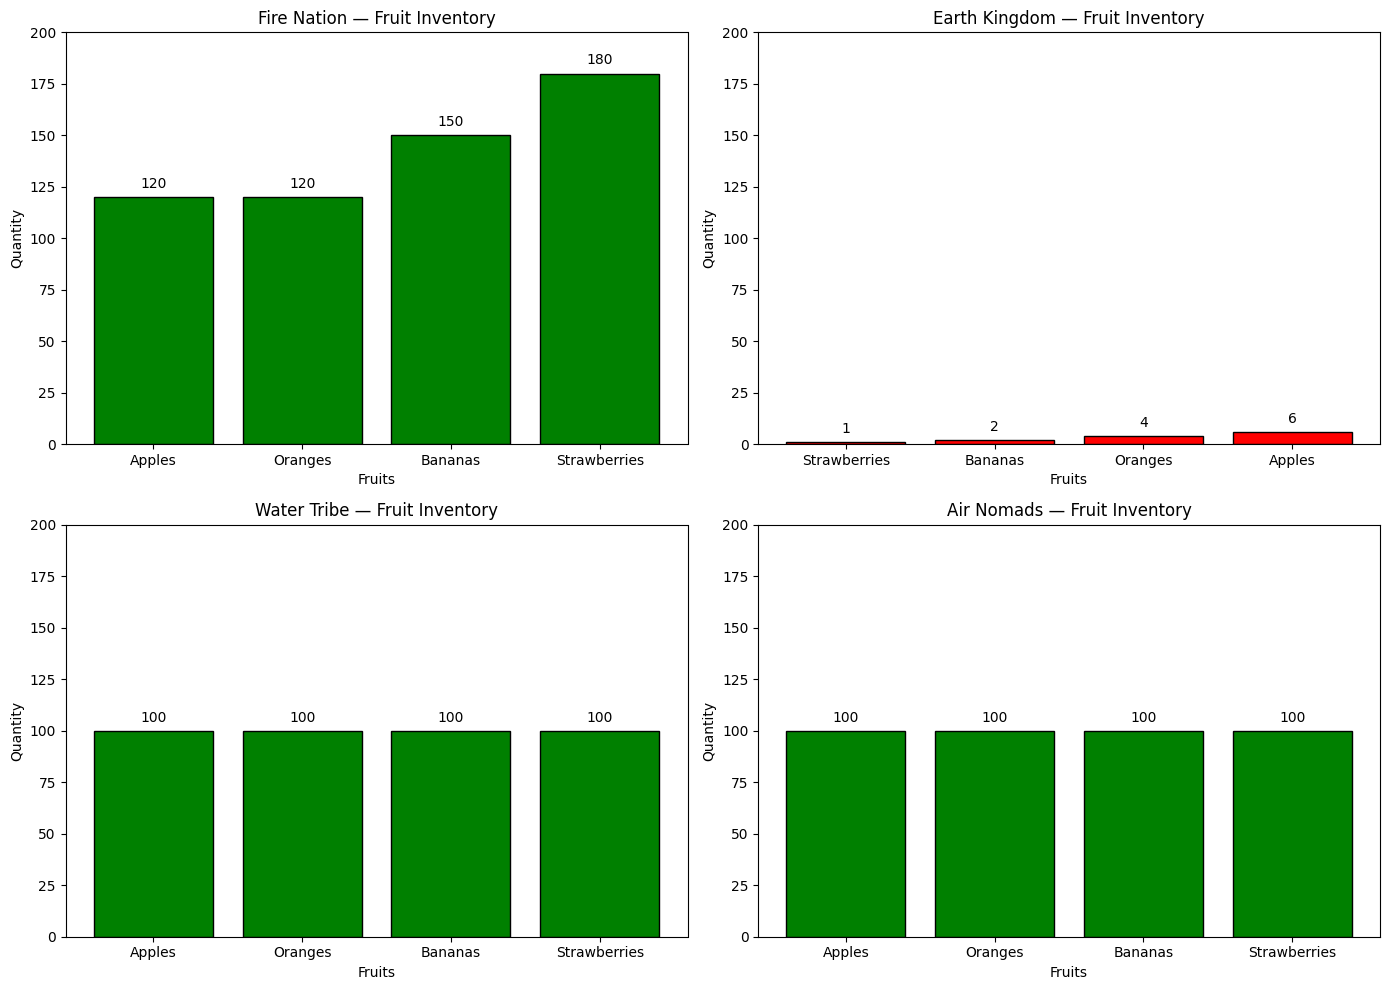

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10)) 

fire_nation.visualize_resources(ax=axes[0, 0])
earth_kingdom.visualize_resources(ax=axes[0, 1])
water_tribe.visualize_resources(ax=axes[1, 0])
air_nomads.visualize_resources(ax=axes[1, 1])

plt.tight_layout()
plt.show()

**7)****

* The organical_growth() method

This method takes no user provided arguments. It represents the fact that each faction has natural farms that grow fruits.

When this method is called by a faction, it should randomly increase the amound of each, individually, by a seperate random amount ranging from 1 to 5.

Remember that the maximum amount of each fruit, individually, is 200. Make sure that the amount is unable to increase beyond that.

Also, print out the changes that are happening. For example:

    if current_amount_of_oranges < 200:
    
        Glorious {faction_name} has harvested 4 oranges, to a new total of 164!

    if current_amount_of_oranges == 200:

        Glorious {faction_name} is already at maximum capacity for oranges!
    
        

In [23]:
fire_nation.organical_growth()
water_tribe.organical_growth()

Glorious Fire Nation has harvested 5 apples, to a new total of 125!
Glorious Fire Nation has harvested 2 oranges, to a new total of 122!
Glorious Fire Nation has harvested 3 bananas, to a new total of 153!
Glorious Fire Nation has harvested 2 strawberries, to a new total of 182!
Glorious Water Tribe has harvested 1 apples, to a new total of 101!
Glorious Water Tribe has harvested 3 oranges, to a new total of 103!
Glorious Water Tribe has harvested 3 bananas, to a new total of 103!
Glorious Water Tribe has harvested 5 strawberries, to a new total of 105!


**8)*****

* The __mul__() method

Here we go! We're going to overload the * operator to represent an attack on a rival faction!

    When an attack occurs, there will be an 70% probability of it being successful. 

If the attack fails, the defender is considered to have defended skillfully and nothing else happens.

    A successful attack will transfer, to the attacking faction, 20% of all remaining fruits (of all sorts) from the defending rival faction.

In addition, if an attack is successful, there is an independent 10% probability of it being CRITICAL. This will increase the percentage looted to 40%, instead of 20%

    Importantly, if the defending faction has no resources left once the attack starts, the aggressor should be prompted to choose another target since there is no GLORY in kicking down on an opponent already brought to its knees.

Remember that the total number of each fruit a faction can hold can't increase beyond 200. If more is looted by the attacker  can be held by the attack, we consider those abundant fruits 'casaulties of war'. Meaning, the defending faction still loses them, but they are simply lost in the chaos and not added to the attackers stockpile.

    Additionally, if for example a faction only has a few remaining (say ~5) fruits remaining of any given kind - implement some functionality for a 'humilitating blow' whereby the attacker steals all remaining fruits. This is needed since only looting percentages will make it impossible to nullify a factions resources. 

For each of the possible actions described above, print out some cool texts so that the user is able to clearly follow the silliness!

    As an extra, you can first import time, and then add time.sleep(2) after each print, to create some suspense.

In [24]:
# CASE 1
fire_nation = Faction("Fire Nation", 100, 100, 100, 100)
earth_kingdom = Faction("Earth Kingdom", 50, 50, 50, 50)

print("BEFORE ATTACK")
print(fire_nation)
print(earth_kingdom)
print("")

# ATTACK
fire_nation * earth_kingdom

print("\nAFTER ATTACK")
print(fire_nation)
print(earth_kingdom)

BEFORE ATTACK
Faction(name='Fire Nation', apples=100, oranges=100, bananas=100, strawberries=100)
Faction(name='Earth Kingdom', apples=50, oranges=50, bananas=50, strawberries=50)

Successful attack! Loot percentage is 20%
Fire Nation loots 10 apples from Earth Kingdom.
Fire Nation: 110/200 apples  |  Earth Kingdom: 40 apples
Fire Nation loots 10 oranges from Earth Kingdom.
Fire Nation: 110/200 oranges  |  Earth Kingdom: 40 oranges
Fire Nation loots 10 bananas from Earth Kingdom.
Fire Nation: 110/200 bananas  |  Earth Kingdom: 40 bananas
Fire Nation loots 10 strawberries from Earth Kingdom.
Fire Nation: 110/200 strawberries  |  Earth Kingdom: 40 strawberries

Summary — Total looted: 40; casualties (lost): 0.

AFTER ATTACK
Faction(name='Fire Nation', apples=110, oranges=110, bananas=110, strawberries=110)
Faction(name='Earth Kingdom', apples=40, oranges=40, bananas=40, strawberries=40)


In [25]:
# CASE 2
print("BEFORE ATTACK")
print(water_tribe)
print(air_nomads)
print("")

# ATTACK
water_tribe * air_nomads

print("\nAFTER ATTACK")
print(water_tribe)
print(air_nomads)

BEFORE ATTACK
Faction(name='Water Tribe', apples=101, oranges=103, bananas=103, strawberries=105)
Faction(name='Air Nomads', apples=100, oranges=100, bananas=100, strawberries=100)

Air Nomads defended skillfully! The attack failed.

AFTER ATTACK
Faction(name='Water Tribe', apples=101, oranges=103, bananas=103, strawberries=105)
Faction(name='Air Nomads', apples=100, oranges=100, bananas=100, strawberries=100)


In [26]:
# CASE 3
earth_kingdom = Faction('Earth Kingdom', 6, 4, 2, 1)
fire_nation = Faction('Fire Nation', 120, 120, 150, 180)

print("BEFORE ATTACK")
print(earth_kingdom)
print(fire_nation)
print("")

earth_kingdom * fire_nation

print("\nAFTER ATTACK")
print(earth_kingdom)
print(fire_nation)


BEFORE ATTACK
Faction(name='Earth Kingdom', apples=6, oranges=4, bananas=2, strawberries=1)
Faction(name='Fire Nation', apples=120, oranges=120, bananas=150, strawberries=180)

Successful attack! Loot percentage is 20%
Earth Kingdom loots 24 apples from Fire Nation.
Earth Kingdom: 30/200 apples  |  Fire Nation: 96 apples
Earth Kingdom loots 24 oranges from Fire Nation.
Earth Kingdom: 28/200 oranges  |  Fire Nation: 96 oranges
Earth Kingdom loots 30 bananas from Fire Nation.
Earth Kingdom: 32/200 bananas  |  Fire Nation: 120 bananas
Earth Kingdom loots 36 strawberries from Fire Nation.
Earth Kingdom: 37/200 strawberries  |  Fire Nation: 144 strawberries

Summary — Total looted: 114; casualties (lost): 0.

AFTER ATTACK
Faction(name='Earth Kingdom', apples=30, oranges=28, bananas=32, strawberries=37)
Faction(name='Fire Nation', apples=96, oranges=96, bananas=120, strawberries=144)


**9) BONUS**

* The trade_offer() method

This method allows for the given faction to offer up a trade of resources to another faction.

It should take 5 arguments: 

1. The faction that is being offered the trade
2. The resource (fruit) that is being offered
3. The amount of said resource that is being offered
4. The resource (fruit) that is being requested in return
5. The amount of said resource that is being requested in return

The method should first check if both factions have sufficient amounts of respective resource. It should also check that no faction exceeds the 200 resources limit, should a trade go through.

If any of the restrictions above is violated, the trade request should be aborted and a suitable message printed.

If the conditions are favourable for an exchange, i.e., none of the restrictions are violated, then the trade should be accepted, resources exchanged and a suitable message printed. 

Importantly, the exchange of resources should be reflected in the actual inventories of the two factions.

We can have more fun by adding an additional dynamic! 

Implement functionality so that if the the amount of offered resources is *less* than the amount of resources requested, the target faction gets **incredibly insulted** an launches an instant attack! This attack is simply the one defined by the __mul__()-method we defined earlier. 




In [27]:
print("--- CASE 1: Successful Trade ---\n")

fire_nation = Faction('Fire Nation', 120, 120, 150, 180)
water_tribe = Faction('Water Tribe', 100, 100, 100, 100)

print("Before trade:")
print(fire_nation)
print(water_tribe)
print("")

_ = fire_nation.trade_offer(water_tribe, "apples", 10, "oranges", 10)

print("\nAfter trade:")
print(fire_nation)
print(water_tribe)

--- CASE 1: Successful Trade ---

Before trade:
Faction(name='Fire Nation', apples=120, oranges=120, bananas=150, strawberries=180)
Faction(name='Water Tribe', apples=100, oranges=100, bananas=100, strawberries=100)

Trade accepted! Fire Nation traded 10 apples for 10 oranges with Water Tribe.

After trade:
Faction(name='Fire Nation', apples=110, oranges=130, bananas=150, strawberries=180)
Faction(name='Water Tribe', apples=110, oranges=90, bananas=100, strawberries=100)


In [28]:
print("--- CASE 2: Insulting Offer ---\n")

earth_kingdom = Faction('Earth Kingdom', 6, 4, 2, 1)
fire_nation = Faction('Fire Nation', 120, 120, 150, 180)

_ = earth_kingdom.trade_offer(fire_nation, "apples", 5, "bananas", 10)

--- CASE 2: Insulting Offer ---

Fire Nation is insulted by this offer and launches an attack!

Successful attack! Loot percentage is 20%
Fire Nation loots 1 apples from Earth Kingdom.
Fire Nation: 121/200 apples  |  Earth Kingdom: 5 apples
Fire Nation lands a HUMILIATING BLOW and steals the last 4 oranges from Earth Kingdom!
Fire Nation: 124/200 oranges  |  Earth Kingdom: 0 oranges
Fire Nation lands a HUMILIATING BLOW and steals the last 2 bananas from Earth Kingdom!
Fire Nation: 152/200 bananas  |  Earth Kingdom: 0 bananas
Fire Nation lands a HUMILIATING BLOW and steals the last 1 strawberries from Earth Kingdom!
Fire Nation: 181/200 strawberries  |  Earth Kingdom: 0 strawberries

Summary — Total looted: 8; casualties (lost): 0.
